In [1]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_nway_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


In [4]:
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

nway_res = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_nway.pkl')
nway_res_dist_only = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_nway_distance_only.pkl')

# nway_res.columns = [x+'_all' for x in nway_res.columns]
# nway_res_no_grz.columns = [x+'_no_grz' for x in nway_res_no_grz.columns]
# nway_res_dist_only.columns = [x+'_dist_only' for x in nway_res_dist_only.columns]


# nway_res_matches = nway_res[nway_res.match_flag == 1]
# nway_res_no_grz_matches = nway_res_no_grz[nway_res_no_grz.match_flag == 1]
# nway_res_dist_only_matches = nway_res_dist_only[nway_res_dist_only.match_flag == 1]


In [8]:
#join three tables on EROSITA, DESI columns into one with appropriate suffixes
nway_res_concat = nway_res.merge(nway_res_dist_only[['EROSITA', 'DESI', 'p_single',	'match_flag',	'prob_has_match',	'prob_this_match',]], on=['EROSITA', 'DESI'], suffixes=['_nnmag', '_dist_only'], how='left')
nway_res_concat

,EROSITA,DESI,Separation_EROSITA_DESI,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,bias_DESI_nnmag_grz,bias_DESI_nnmag_grzw1w2,bias_DESI_nnmag_grzw1w2w3w4,p_single_nnmag,match_flag_nnmag,prob_has_match_nnmag,prob_this_match_nnmag,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp,desi_id,ra,dec,mag_g,mag_r,mag_z,mag_w1,mag_w2,mag_w3,mag_w4,col_gr,col_rz,col_gz,col_zw1,col_rw2,col_w1w2,col_zw3,col_rw4,col_w3w4,prior_type,nnmag_grzw1w2w3w4,nnmag_grzw1w2w3w4_orig,nnmag_grzw1w2,nnmag_grzw1w2_orig,nnmag_grz,nnmag_grz_orig,mag_g_orig,mag_r_orig,mag_z_orig,mag_w1_orig,mag_w2_orig,mag_w3_orig,mag_w4_orig,col_gr_orig,col_rz_orig,col_gz_orig,col_zw1_orig,col_rw2_orig,col_w1w2_orig,col_zw3_orig,col_rw4_orig,col_w3w4_orig,p_single_dist_only,match_flag_dist_only,prob_has_match_dist_only,prob_this_match_dist_only
0,0,10477,0.042512,0.042512,2,11.113504,11.113504,9.819219e-01,1.000000,1.000000,32.427305,9.994326e-01,1,0.999433,1.000000e+00,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN,b'9011_609162_1184',159.434616,57.198786,-99.000000,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,b'grzw1w2w3w4',0.972866,0.972866,-99.000000,0.980098,-99.000000,0.956225,16.058165,16.111576,15.616705,14.459218,14.227020,14.269917,13.372561,-0.053411,0.494871,0.441460,1.157487,1.884556,0.232198,1.346788,2.739015,0.897356,9.819219e-01,1,0.981922,1.000000e+00
1,0,2289777,9.399113,9.399113,2,-18.205065,-18.205065,2.608283e-28,0.376203,1.000000,1.000000,9.812431e-29,0,0.999433,5.571116e-32,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN,b'9011_609162_1223',159.439360,57.199177,-99.000000,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,b'grz',-99.000000,-99.000000,-99.000000,-99.000000,0.246462,0.246462,25.948793,24.556490,22.966312,NaN,NaN,NaN,NaN,1.392303,1.590178,2.982481,NaN,NaN,NaN,NaN,NaN,NaN,2.608283e-28,0,0.981922,4.802100e-30
2,0,784834,9.507520,9.507520,2,-18.885286,-18.885286,5.446703e-29,1.000000,1.000000,0.598113,3.257743e-29,0,0.999433,1.849619e-32,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN,b'9011_609162_1210',159.437965,57.200696,-99.000000,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,b'grzw1w2w3w4',0.310877,0.310877,-99.000000,0.615367,-99.000000,0.349475,23.338484,23.416210,23.045345,21.072514,21.045940,17.639517,15.477362,-0.077726,0.370865,0.293139,1.972831,2.370270,0.026574,5.405828,7.938848,2.162155,5.446703e-29,0,0.981922,1.002790e-30
3,0,1418910,10.924277,10.924277,2,-28.492115,-28.492115,1.346804e-38,1.000000,1.000000,1.000000,1.346804e-38,0,0.999433,7.646629e-42,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN,b'9011_609162_1191',159.435390,57.201792,0.685364,0.687664,-99.0,0.637958,0.613978,-99.000000,-99.000000,-0.008048,-99.0,-99.0,-99.000000,0.257898,0.083929,-99.000000,-99.000000,-99.0,b'None',-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,23.987741,24.068224,NaN,22.328527,21.489239,NaN,NaN,-0.080483,NaN,NaN,NaN,2.578985,0.839288,NaN,NaN,NaN,1.346804e-38,0,0.981922,2.479596e-40
4,0,1123492,13.104032,13.104032,2,-45.874472,-45.874472,5.584023e-56,1.000000,0.041253,1.000000,2.303556e-57,0,0.999433,1.307870e-60,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN,b'9011_609162_1232',159.440651,57.200364,-99.000000,-99.000000,-99.0,-99.000000,-99.000000,0.531425,-99.000000,-99.000000,-99.0,-99.0,-99.000000,-99.000000,-99.000000,0.229017,-99.000000,-99.0,b'grzw1w2',-99.000000,-99.000000,0.045164,0.045164,-99.000000,0.377938,23.716750,22.213188,20.890049,20.275759,20.926012,18.599876,NaN,1.503562,1.323139,2.826701,0.614290,1.287176,-0.650253,2.290173,NaN,NaN,5.584023e-56,0,0.981922,1.028072

In [9]:
[x for x in nway_res_concat.columns if 'match_flag' in x]

['match_flag_nnmag', 'match_flag_dist_only']

In [10]:
nway_res_concat.groupby('match_flag_nnmag')[['match_flag_dist_only']].value_counts()

match_flag_nnmag  match_flag_dist_only
0                 0                       127758
                  2                         2674
                  1                         1707
1                 1                         7456
                  2                         1122
                  0                          922
2                 0                          455
                  1                          337
                  2                          273
dtype: int64

In [16]:
nway_res_concat.columns

test_columns = ['EROSITA', 'Separation_EROSITA_DESI', 'pos_err',
       'match_flag_nnmag', 'prob_has_match_nnmag', 'prob_this_match_nnmag',
       'match_flag_dist_only','prob_has_match_dist_only', 'prob_this_match_dist_only',
       'ID', 'desi_id_true_ctp', 'desi_id', 'prior_type', 'nnmag_grzw1w2w3w4',
       'nnmag_grzw1w2', 'nnmag_grz', ]

test_columns_explain = ['EROSITA', 'Separation_EROSITA_DESI', 'pos_err',
       'match_flag', 'prob_has_match', 'prob_this_match',
       'ID', 'desi_id_true_ctp', 'desi_id', 'prior_type', 'nnmag_grzw1w2w3w4',
       'nnmag_grzw1w2', 'nnmag_grz', ]

explain_args = {'primary_id_col':'EROSITA', 'cols_ra' : ['RA', 'ra'], 'cols_dec':['DEC', 'dec'], 'cols_err': ['pos_err', 'desi_pos_err'], 'tablenames': ['EROSITA', 'DESI']}

# Completeness/purity analysis

NWAY PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for nway matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct nway assignment
 Completeness = 95% 
 Purity = 95% 
 prob_has_match optimal cutoff =  0.42 
 Fraction of sources with prob_has_match > 0.42 = 82%
+++Statistics+++
687 X-ray sources in validation set with counterparts
--Out of those, 32 sources were assigned hostless (prob_has_match < 0.42) 
655 sources have prob_has_match > 0.42
Out of those 655: 
--625 sources have correct nway counterpart
--30 sources have incorrect nway counterpart
NWAY PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for nway matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct nway assignment
 Completeness = 84% 
 Purity = 85% 
 prob_has_match optimal cutoff =  0.63 
 Fraction of sources with prob_has_match > 0.63 =

Text(0.5, 0.98, 'XMM/CHANDRA Lockman Hole validation catalog')

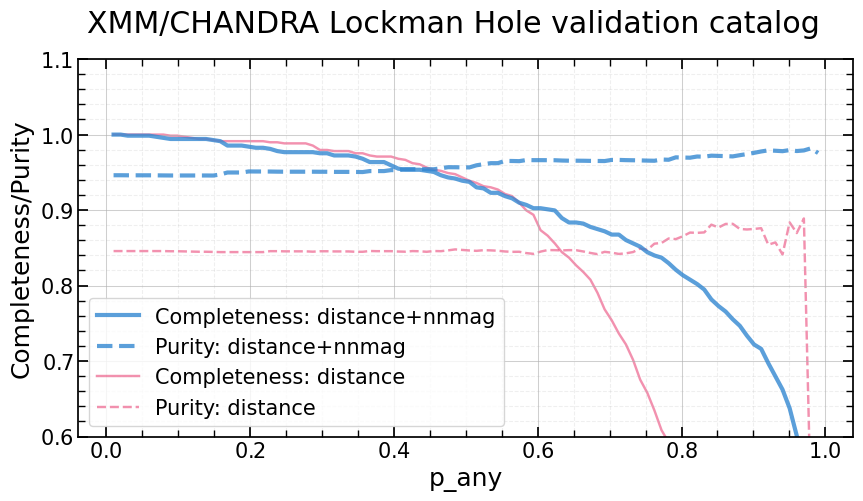

In [61]:
cutoff_intersection_nnmag, completeness_intersection_nnmag,  cutoffs_nnmag, completeness_nnmag, purity_nnmag = assess_goodnes_nway_cross_match(nway_res, plot_res=False)
cutoff_intersection_dist_only, completeness_intersection_dist_only,  cutoffs_dist_only, completeness_dist_only, purity_dist_only = assess_goodnes_nway_cross_match(nway_res_dist_only, plot_res=False)


plt.figure(figsize=(10,5))

plt.plot(cutoffs_nnmag, completeness_nnmag, 'C0-', lw = 3, alpha = 0.8, label=f'Completeness: distance+nnmag')
plt.plot(cutoffs_nnmag, purity_nnmag, 'C0--', lw = 3,  alpha = 0.8, label=f'Purity: distance+nnmag')

plt.plot(cutoffs_dist_only, completeness_dist_only, 'C1-', alpha = 0.5, label=f'Completeness: distance', zorder = -1)
plt.plot(cutoffs_dist_only, purity_dist_only, 'C1--', alpha = 0.5, label=f'Purity: distance', zorder = -1)

plt.legend()

plt.ylim(0.6,1.1)
plt.xlabel('p_any')

plt.grid(visible=True, which='major', linestyle='-', alpha = 0.6)

plt.grid(visible=True, which='minor', linestyle='--', alpha=0.2)

plt.ylabel('Completeness/Purity')
plt.suptitle('XMM/CHANDRA Lockman Hole validation catalog')


# Plot distribution of nnmags for good matches with validation catalog

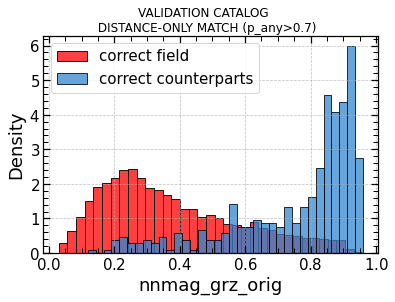

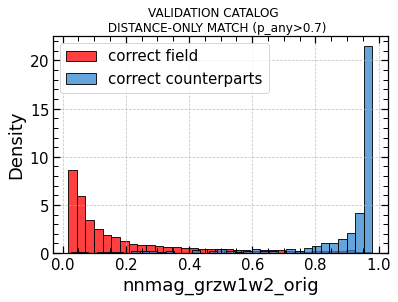

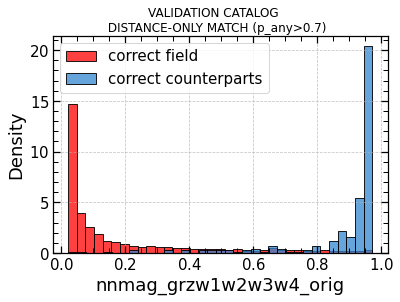

In [36]:
for prior_type in ['grz_orig', 'grzw1w2_orig', 'grzw1w2w3w4_orig']:
    prob_cutoff = 0.7
    plt.figure()
    sns.histplot(nway_res_dist_only.query(f"prob_has_match>@prob_cutoff & match_flag==0 & nnmag_{prior_type}!=-99. & ~desi_id_true_ctp.isnull()")['nnmag_'+prior_type], stat = 'density', color = 'r', bins = 35, label = 'correct field')
    sns.histplot(nway_res_dist_only.query(f"prob_has_match>@prob_cutoff & match_flag==1 & nnmag_{prior_type}!=-99. & desi_id==desi_id_true_ctp")['nnmag_'+prior_type], stat = 'density', bins = 35, label = 'correct counterparts')
    plt.suptitle(f'VALIDATION CATALOG \n DISTANCE-ONLY MATCH (p_any>{prob_cutoff})')
    plt.legend()

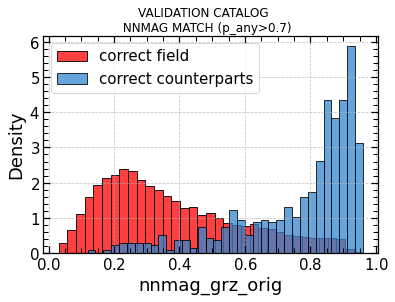

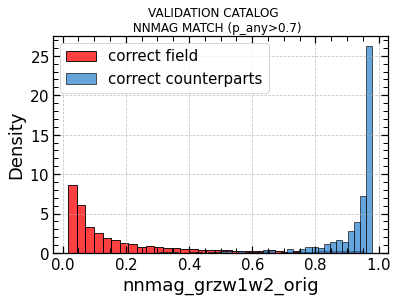

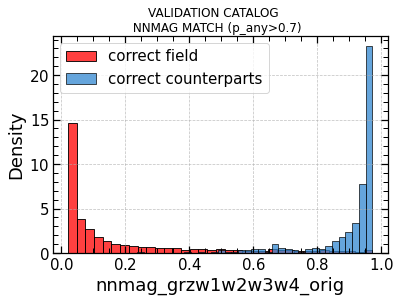

In [37]:
for prior_type in ['grz_orig', 'grzw1w2_orig', 'grzw1w2w3w4_orig']:
    prob_cutoff = 0.7
    plt.figure()
    sns.histplot(nway_res.query(f"prob_has_match>@prob_cutoff & match_flag==0 & nnmag_{prior_type}!=-99. & ~desi_id_true_ctp.isnull()")['nnmag_'+prior_type], stat = 'density', color = 'r', bins = 35, label = 'correct field')
    sns.histplot(nway_res.query(f"prob_has_match>@prob_cutoff & match_flag==1 & nnmag_{prior_type}!=-99. & desi_id==desi_id_true_ctp")['nnmag_'+prior_type], stat = 'density', bins = 35, label = 'correct counterparts')
    plt.suptitle(f'VALIDATION CATALOG \n NNMAG MATCH (p_any>{prob_cutoff})')
    plt.legend()

# Separations between best matches and erosita 

5798 objects with p_any>0.8


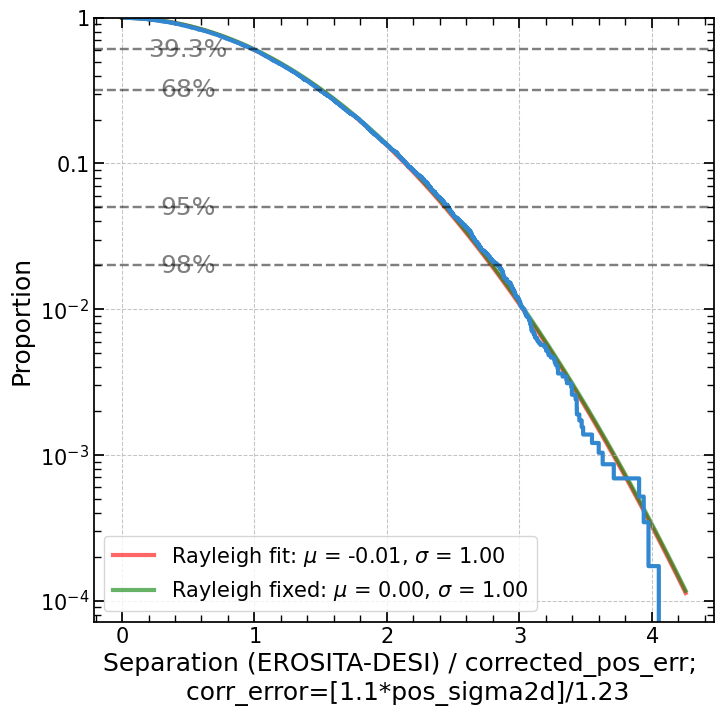

In [107]:
from scipy import stats
prob_cutoff = 0.8
ero_ctps_tmp = nway_res.query(f"prob_has_match>@prob_cutoff & match_flag==1")
print(f'{len(ero_ctps_tmp)} objects with p_any>{prob_cutoff}')
fig,  ax =  plt.subplots( figsize = (8,8))
pos_err = ero_ctps_tmp.pos_err
corrected_pos_err = pos_err/1.23

rat = ero_ctps_tmp.Separation_EROSITA_DESI/corrected_pos_err

corr_error_str = '[1.1*pos_sigma2d]/1.23'
rayleigh_fit = stats.rayleigh.fit(rat)
#sns.histplot(ero_ctps_tmp, x = rat, bins=50, stat = 'density', ax = ax)
sns.ecdfplot(ero_ctps_tmp, x = rat, ax = ax, complementary = True, lw = 3)

for prob in [39.3, 68, 95, 98]:
    plt.axhline(1 - prob/100, color = 'k', ls = '--', alpha = 0.5)
    plt.text(0.5, 1 - prob/100, f'{prob}%', ha = 'center', va = 'center', color = 'k', alpha = 0.5)


#plot the fit
x = np.linspace(0, rat.max()*1.05, 100)
ax.plot(x, 1-stats.rayleigh.cdf(x, *rayleigh_fit), 'r-', lw=3, alpha=0.6, label='Rayleigh fit: '+'$\mu$ = %.2f, $\sigma$ = %.2f' % rayleigh_fit, zorder = -1)
ax.plot(x, 1-stats.rayleigh.cdf(x, 0,1), 'g-', lw=3, alpha=0.6, label='Rayleigh fixed: '+'$\mu$ = %.2f, $\sigma$ = %.2f' % (0,1), zorder = -1)
plt.legend()
plt.xlabel('Separation (EROSITA-DESI) / corrected_pos_err; \n '+ 'corr_error='+corr_error_str)
plt.yscale('log')

# Look a few  Individual cases with validation catalog

In [20]:
nway_res_concat.query('~desi_id_true_ctp.isnull() &  match_flag_nnmag == 1 & match_flag_dist_only==0')[test_columns].sort_values('prob_has_match_nnmag')

,EROSITA,Separation_EROSITA_DESI,pos_err,match_flag_nnmag,prob_has_match_nnmag,prob_this_match_nnmag,match_flag_dist_only,prob_has_match_dist_only,prob_this_match_dist_only,ID,desi_id_true_ctp,desi_id,prior_type,nnmag_grzw1w2w3w4,nnmag_grzw1w2,nnmag_grz
119038,7854,8.911259,3.902971,1,0.081247,0.547622,0,0.517477,0.160918,b'SRGe J104047.8+574846',b'9011_610719_1771',b'9011_610719_1771',b'grzw1w2w3w4',0.201748,-99.000000,-99.000000
103056,6748,5.423450,3.086368,1,0.149238,0.613187,0,0.743973,0.274702,b'SRGe J105322.6+580411',b'9011_611495_2267',b'9011_611495_2254',b'grzw1w2w3w4',0.099467,-99.000000,-99.000000
79156,5115,7.487568,2.969797,1,0.167161,0.491931,0,0.420882,0.231844,b'SRGe J104819.3+590929',b'9011_615261_644',b'9011_615261_633',b'grzw1w2w3w4',0.427014,-99.000000,-99.000000
117713,7766,9.099030,3.103191,1,0.230545,0.761039,0,0.290585,0.122989,b'SRGe J103359.9+573932',b'9011_610715_3151',b'9011_610715_3151',b'grzw1w2w3w4',0.824233,-99.000000,-99.000000
116515,7682,6.636129,2.842618,1,0.315544,0.746638,0,0.611869,0.183512,b'SRGe J105545.0+573103',b'9011_609952_907',b'9011_609952_907',b'grz',-99.000000,-99.000000,0.589098
130156,8621,8.313432,4.191831,1,0.349263,0.382754,0,0.603459,0.186326,b'SRGe J105259.1+572249',b'9011_609950_3145',b'9011_609950_3145',b'grzw1w2',-99.000000,0.418809,-99.000000
133442,8845,7.227458,3.961575,1,0.391693,0.372752,0,0.802035,0.106021,b'SRGe J105209.9+572103',b'9011_609170_705',b'9011_609170_687',b'grz',-99.000000,-99.000000,0.368412
84878,5512,7.558949,3.402884,1,0.393398,0.650554,0,0.638446,0.147818,b'SRGe J103254.1+574157',b'9011_610715_1032',b'9011_610715_1032',b'grzw1w2',-99.000000,0.533322,-99.000000
121326,8013,8.689488,4.448720,1,0.396587,0.574012,0,0.692113,0.118790,b'SRGe J104221.5+583805',b'9011_613766_2125',b'9011_613766_2125',b'grzw1w2w3w4',0.576268,-99.000000,-99.000000
40732,2521,5.336930,1.996650,1,0.469595,0.909151,0,0.687711,0.114606,b'SRGe J105537.3+574657',b'9011_610727_1441',b'9011_610727_1441',b'grzw1w2w3w4',0.781718,-99.000000,-99.000000


NWAY results for Source 774:

This source probably has a counterpart (p_any=1.00)

Assuming it has a counterpart, we have the following possible associations:

Disclaimer: These results assume that the input (sky densities, positional errors, and priors) are correct.



,EROSITA,Separation_EROSITA_DESI,pos_err,match_flag,prob_has_match,prob_this_match,ID,desi_id_true_ctp,desi_id,prior_type,nnmag_grzw1w2w3w4,nnmag_grzw1w2,nnmag_grz
13928,774,2.383453,1.499296,1,0.996464,9.596055e-01,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_28',b'grzw1w2',-99.000000,0.976325,-99.000000
13935,774,1.223371,1.499296,0,0.996464,4.015319e-02,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_21',b'None',-99.000000,-99.000000,-99.000000
13942,774,3.933123,1.499296,0,0.996464,2.327674e-04,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_33',b'grz',-99.000000,-99.000000,0.140242
13943,774,6.088338,1.499296,0,0.996464,8.511193e-06,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_51',b'grz',-99.000000,-99.000000,0.381087
13932,774,9.321336,1.499296,0,0.996464,4.994660e-11,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613770_3410',b'grzw1w2',-99.000000,0.151798,-99.000000
13934,774,13.382376,1.499296,0,0.996464,6.959202e-20,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_78',b'grz',-99.000000,-99.000000,0.164488
13930,774,15.075722,1.499296,0,0.996464,2.688095e-25,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613770_3394',b'grzw1w2',-99.000000,0.025304,-99.000000
13941,774,19.893368,1.499296,0,0.996464,1.013864e-40,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_97',b'grz',-99.000000,-99.000000,0.174013
13937,774,20.451520,1.499296,0,0.996464,1.951621e-43,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_66',b'grz',-99.000000,-99.000000,0.080396
13929,774,24.092298,1.499296,0,0.996464,6.662926e-59,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_88',b'grzw1w2',-99.000000,0.073076,-99.000000


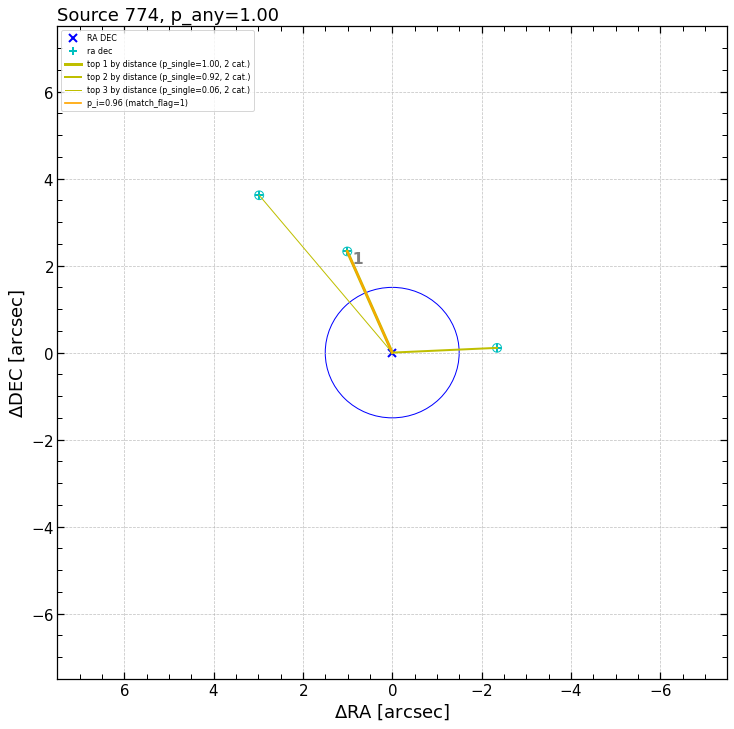

In [27]:
import nway_python_api as nway

ero_id = 774
#774 - expected perfomance of nnmags: true ctps is not the closest but has a large nnmag_grzw1w2  -> unambiguous correct match
#5115 -example when true ctps has low grzw1w2, and a field source on the same separation has a moderate nnmag_grzw1w2w3w4 -> wrong association
#6748 -example when the closest is a true ctps, but NNMAG is low for him, hence nnmag assigns other DESI source as a counterpart. p_any is low for nnmag and high for distance-only
nway.explain(nway_res, id = ero_id, **explain_args)[test_columns_explain]


NWAY results for Source 774:

This source probably has a counterpart (p_any=0.94)

Assuming it has a counterpart, we have the following possible associations:

Disclaimer: These results assume that the input (sky densities, positional errors, and priors) are correct.



,EROSITA,Separation_EROSITA_DESI,pos_err,match_flag,prob_has_match,prob_this_match,ID,desi_id_true_ctp,desi_id,prior_type,nnmag_grzw1w2w3w4,nnmag_grzw1w2,nnmag_grz
13935,774,1.223371,1.499296,1,0.942236,6.936751e-01,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_21',b'None',-99.000000,-99.000000,-99.000000
13928,774,2.383453,1.499296,0,0.942236,2.746311e-01,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_28',b'grzw1w2',-99.000000,0.976325,-99.000000
13942,774,3.933123,1.499296,0,0.942236,3.143064e-02,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_33',b'grz',-99.000000,-99.000000,0.140242
13943,774,6.088338,1.499296,0,0.942236,2.631344e-04,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_51',b'grz',-99.000000,-99.000000,0.381087
13932,774,9.321336,1.499296,0,0.942236,4.255098e-09,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613770_3410',b'grzw1w2',-99.000000,0.151798,-99.000000
13934,774,13.382376,1.499296,0,0.942236,5.777313e-18,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_78',b'grz',-99.000000,-99.000000,0.164488
13930,774,15.075722,1.499296,0,0.942236,1.340368e-22,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613770_3394',b'grzw1w2',-99.000000,0.025304,-99.000000
13941,774,19.893368,1.499296,0,0.942236,8.416787e-39,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_97',b'grz',-99.000000,-99.000000,0.174013
13937,774,20.451520,1.499296,0,0.942236,5.747415e-41,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_66',b'grz',-99.000000,-99.000000,0.080396
13929,774,24.092298,1.499296,0,0.942236,1.454641e-56,b'SRGe J105053.2+584345',b'9011_613771_28',b'9011_613771_88',b'grzw1w2',-99.000000,0.073076,-99.000000


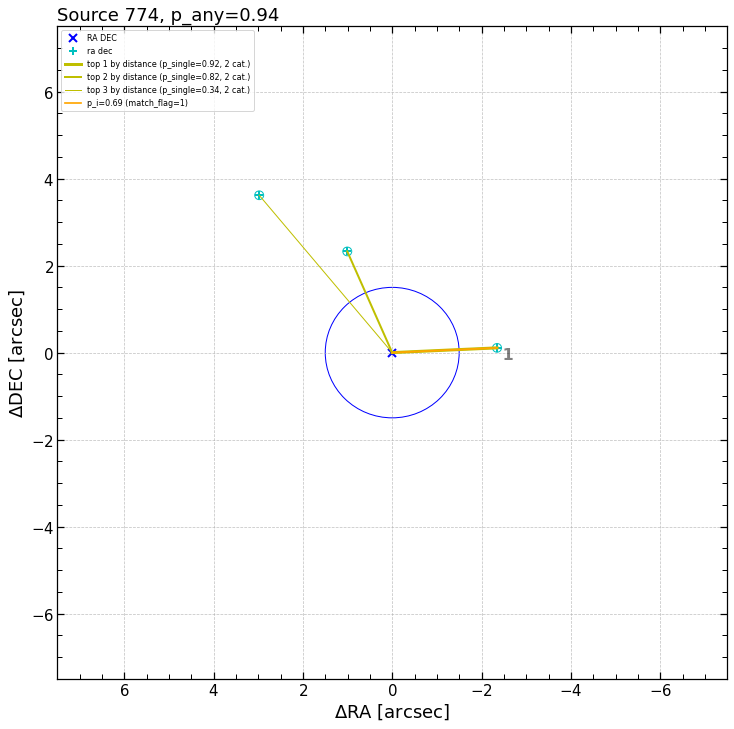

In [28]:
nway.explain(nway_res_dist_only, id = ero_id, **explain_args)[test_columns_explain]
